### Import Packages

In [ ]:
import pandas as pd
import numpy as np 
from tqdm import tqdm
from tensorflow.keras.preprocessing import image
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2

In [2]:
# Read train csv file
poster_df = pd.read_csv("train.csv")

### Feature Engineering

In [3]:
# Convert values in genre to list
poster_df['Genre'] = poster_df['Genre'].apply(eval)

poster_df = poster_df.explode('Genre')

# One Hot Encode genre file
df_encoded = pd.get_dummies(poster_df, columns=['Genre'])

df_final = df_encoded.groupby('Id').sum().reset_index()

### Image Processing

In [9]:
width = 350
height = 350
x = []
for i in tqdm(range(len(df_final))):
    path = 'Movie_Poster_Dataset/' + df_final['Id'][i]+'.jpg'
    img = image.load_img(path , target_size = (width , height,3))
    img = image.img_to_array(img)
    img = img / 255.0
    x.append(img)

x = np.array(x) # independent features

100%|██████████| 7242/7242 [00:05<00:00, 1364.62it/s]


In [10]:
y = df_final.drop(['Id'] , axis=1) # dependent feautures
y = y.to_numpy()

In [11]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size= 0.2)

### Fuction to visualize model fit

In [18]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['binary_accuracy'])
  plt.plot(epochRange,history.history['val_binary_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='best')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='best')
  plt.show()

### Model 1

In [21]:
model1 = Sequential()
model1.add(Conv2D(16, (3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(350, 350, 3)))
model1.add(BatchNormalization())
model1.add(MaxPool2D(2, 2))
model1.add(Dropout(0.3))

model1.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model1.add(BatchNormalization())
model1.add(MaxPool2D(2, 2))
model1.add(Dropout(0.3))

model1.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model1.add(BatchNormalization())
model1.add(MaxPool2D(2, 2))
model1.add(Dropout(0.4))

model1.add(Flatten())
model1.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model1.add(Dropout(0.5))

model1.add(Dense(25, activation='sigmoid'))

/opt/anaconda3/envs/pranit/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 348, 348, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 348, 348, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 174, 174, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 174, 174, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 172, 172, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 172, 172, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 86, 86, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 86, 86, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 84, 84, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 84, 84, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 112896)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,450,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         3,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,478,073 (55.23 MB)

 Trainable params: 14,477,849 (55.23 MB)

 Non-trainable params: 224 (896.00 B)

In [ ]:
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [24]:
est = model1.fit(x_train,y_train , epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 133s 724ms/step - binary_accuracy: 0.8506 - loss: 4.1976 - val_binary_accuracy: 0.4752 - val_loss: 3.1218
Epoch 2/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 127s 696ms/step - binary_accuracy: 0.8767 - loss: 1.3799 - val_binary_accuracy: 0.6737 - val_loss: 3.8314
Epoch 3/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 128s 699ms/step - binary_accuracy: 0.8931 - loss: 1.8270 - val_binary_accuracy: 0.6460 - val_loss: 2.8350
Epoch 4/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 128s 701ms/step - binary_accuracy: 0.8643 - loss: 1.6480 - val_binary_accuracy: 0.8953 - val_loss: 0.6118
Epoch 5/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 126s 691ms/step - binary_accuracy: 0.9039 - loss: 0.5731 - val_binary_accuracy: 0.8431 - val_loss: 0.5967


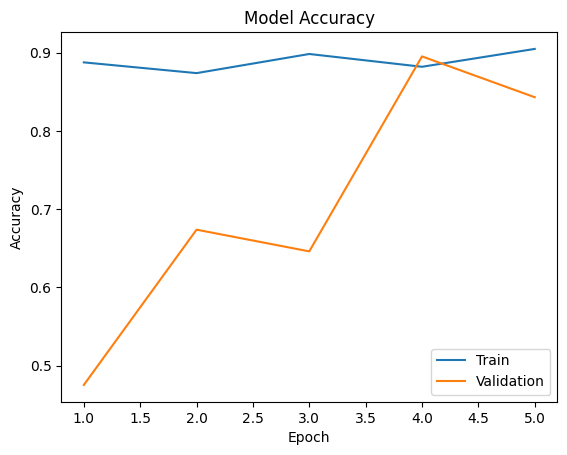

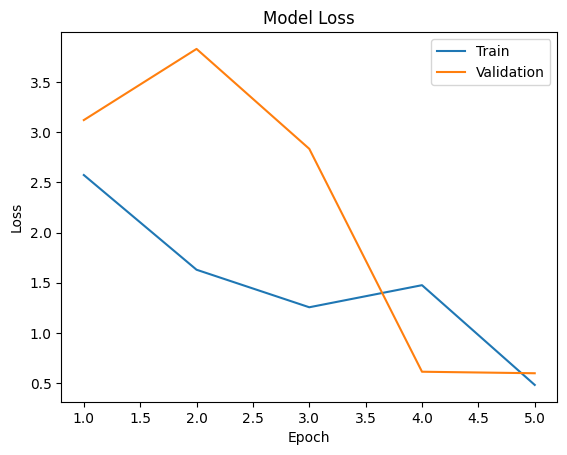

In [31]:
plotLearningCurve(est,5)

### Model 2

In [12]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=x_train[0].shape , kernel_regularizer=l2(0.01)))
model2.add(BatchNormalization())
model2.add(MaxPool2D(2,2))
model2.add(Dropout(0.3))

model2.add(Conv2D(64, kernel_size=(3,3), activation='relu', kernel_regularizer=l2(0.01)))
model2.add(BatchNormalization())
model2.add(MaxPool2D(2,2))
model2.add(Dropout(0.3))

model2.add(Conv2D(128, kernel_size=(3,3), activation='relu', kernel_regularizer=l2(0.01)))
model2.add(BatchNormalization())
model2.add(MaxPool2D(2,2))
model2.add(Dropout(0.4))

model2.add(Flatten())
model2.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(25, activation='sigmoid'))


/opt/anaconda3/envs/pranit/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 348, 348, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 348, 348, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 174, 174, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 174, 174, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 172, 172, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 172, 172, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 86, 86, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 86, 86, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 84, 84, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 84, 84, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 42, 42, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 42, 42, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 225792)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    57,803,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         6,425 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,904,601 (220.89 MB)

 Trainable params: 57,903,641 (220.88 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [15]:
est = model2.fit(x_train,y_train , epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 315s 2s/step - binary_accuracy: 0.5917 - loss: 5.4457 - val_binary_accuracy: 0.9071 - val_loss: 1.2500
Epoch 2/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 297s 2s/step - binary_accuracy: 0.8818 - loss: 1.1038 - val_binary_accuracy: 0.9067 - val_loss: 0.8033
Epoch 3/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 296s 2s/step - binary_accuracy: 0.8979 - loss: 0.7594 - val_binary_accuracy: 0.9069 - val_loss: 0.6131
Epoch 4/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 288s 2s/step - binary_accuracy: 0.9027 - loss: 0.6570 - val_binary_accuracy: 0.9067 - val_loss: 0.5748
Epoch 5/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 293s 2s/step - binary_accuracy: 0.9047 - loss: 0.5811 - val_binary_accuracy: 0.9088 - val_loss: 0.4985


In [16]:
model2.save('genre_detection_model.h5')

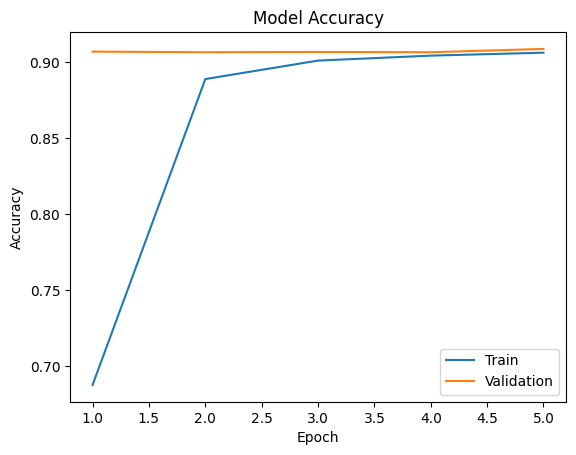

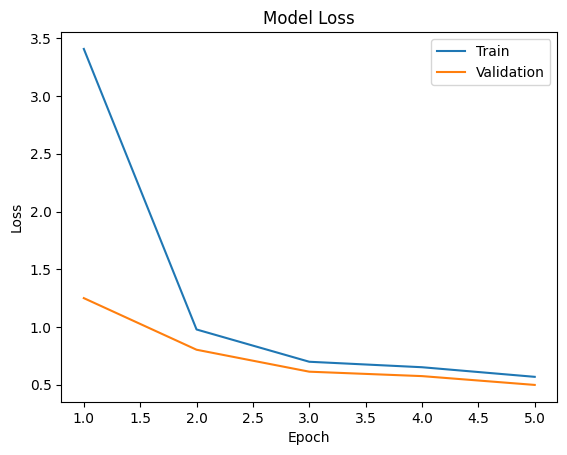

In [19]:
plotLearningCurve(est,5)

### Model 3

In [37]:
model3 =  Sequential()

model3.add(Conv2D(16, kernel_size= (3,3) , activation= 'relu' , input_shape = x_train[0].shape, kernel_regularizer=l2(0.01)))
model3.add(BatchNormalization())
model3.add(MaxPool2D(2,2))
model3.add(Dropout(0.3))

model3.add(Conv2D(32, kernel_size= (3,3) , activation= 'relu' , input_shape = x_train[0].shape, kernel_regularizer=l2(0.01)))
model3.add(BatchNormalization())
model3.add(MaxPool2D(2,2))
model3.add(Dropout(0.3))

model3.add(Conv2D(64, kernel_size= (3,3) , activation= 'relu' , input_shape = x_train[0].shape, kernel_regularizer=l2(0.01)))
model3.add(BatchNormalization())
model3.add(MaxPool2D(2,2))
model3.add(Dropout(0.4))

model3.add(Conv2D(128, kernel_size= (3,3) , activation= 'relu' , input_shape = x_train[0].shape, kernel_regularizer=l2(0.01)))
model3.add(BatchNormalization())
model3.add(MaxPool2D(2,2))
model3.add(Dropout(0.4))

model3.add(Flatten())
model3.add(Dense(256 , activation= 'relu', kernel_regularizer=l2(0.01)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Dense(25, activation= 'sigmoid'))

In [38]:
model3.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 348, 348, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 348, 348, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 174, 174, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 174, 174, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 172, 172, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 172, 172, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 86, 86, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 86, 86, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 84, 84, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 84, 84, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 40, 40, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 40, 40, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │    13,107,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 25)             │         6,425 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,213,305 (50.40 MB)

 Trainable params: 13,212,313 (50.40 MB)

 Non-trainable params: 992 (3.88 KB)

In [ ]:
model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [40]:
est = model3.fit(x_train , y_train , epochs= 5 , validation_data= (x_test, y_test))

Epoch 1/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 155s 840ms/step - binary_accuracy: 0.6135 - loss: 4.0027 - val_binary_accuracy: 0.9058 - val_loss: 1.2503
Epoch 2/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 146s 803ms/step - binary_accuracy: 0.8852 - loss: 0.9688 - val_binary_accuracy: 0.9058 - val_loss: 0.5661
Epoch 3/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 146s 800ms/step - binary_accuracy: 0.9012 - loss: 0.5686 - val_binary_accuracy: 0.9062 - val_loss: 0.4866
Epoch 4/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 145s 796ms/step - binary_accuracy: 0.9038 - loss: 0.4928 - val_binary_accuracy: 0.9066 - val_loss: 0.4879
Epoch 5/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 146s 802ms/step - binary_accuracy: 0.9059 - loss: 0.4830 - val_binary_accuracy: 0.9087 - val_loss: 0.4420


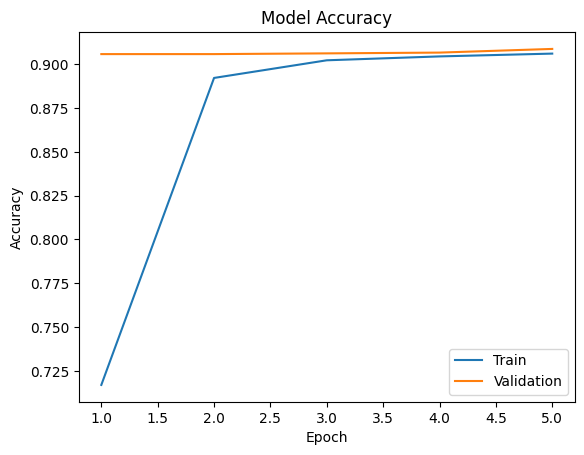

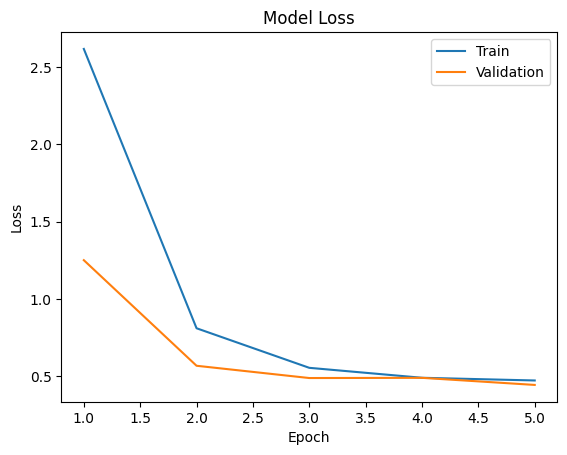

In [41]:
plotLearningCurve(est,5)

Picked model 2 because it has lowest difference in train and validation accuracy

### Predict random poster

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Genre_Family
Genre_Crime
Genre_Adventure


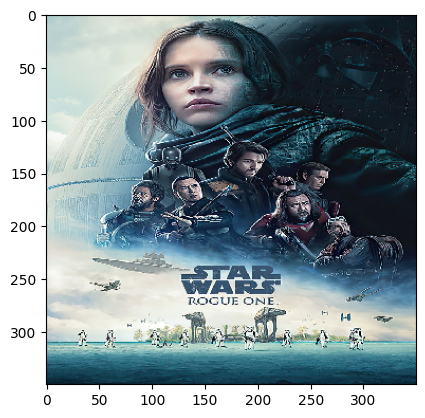

In [21]:
img = image.load_img('poster.jpg',target_size=(width,height,3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1,width,height,3)
classes = df_final.columns[2:]
y_pred = model2.predict(img)
top3=np.argsort(y_pred[0])[:-4:-1]
for i in range(3):
  print(classes[top3[i]])